In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt


In [2]:
with open("problem_data.pickle","rb") as f:
    data =  pickle.load(f)

In [3]:
Flux1, Flux1_std, Flux2, Flux2_std, Cur1, Cur1_std, Cur2, Cur2_std, k = data


In [4]:
Cur1 = Cur1[2:-2]
Cur2 = Cur2[2:-2]

In [5]:
def generate_cell_averages(data):
    data = data[:128]
    data = data.reshape(-1, 8)

    average = []
    for i in data:
        average.append(sum(i))
        
    return np.asarray(average)

In [6]:
cell_averages = []
for i in data[:-1]:
    average = generate_cell_averages(i)
    cell_averages.append(average)

In [7]:

def gen_plot(fluxes):
    fig, (ax) = plt.subplots(1, dpi = 160)
    for i, profile in enumerate(fluxes):
        #ax.plot(range(len(fluxes)), fluxes)
        ax.fill_between(range(len(fluxes)), fluxes - std2, fluxes + std2)
        
    ax.set_xlabel('Cell')
    ax.set_ylabel('Net Current')
    ax.set_title('Average Current by Cell')
    ax.legend()
    plt.show()

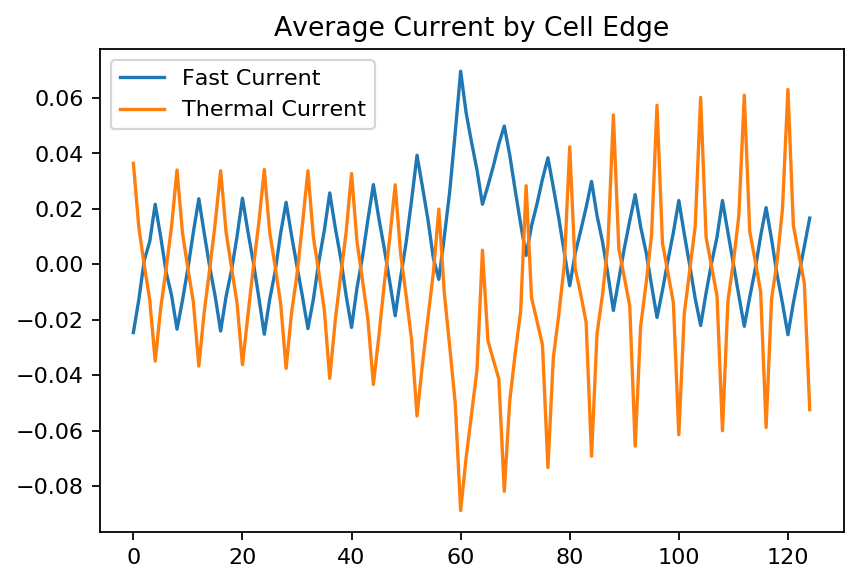

In [8]:
fig, (ax) = plt.subplots(1, dpi = 160)
#ax.fill_between(range(len(Cur1)), Cur1 - Cur1_std, Cur1 + Cur1_std, label ='Fast Current')
#ax.fill_between(range(len(Cur2)), Cur2 - Cur2_std, Cur2 + Cur2_std, label ='Thermal Current')
ax.set_title('Average Current by Cell Edge')
ax.plot(range(len(Cur1)), Cur1, label ='Fast Current')
ax.plot(range(len(Cur2)), Cur2, label ='Thermal Current')
ax.legend()
plt.show()
#plt.savefig()

In [43]:
def plot_flux(Flux1, Flux1_std, Flux2, Flux2_std):
    fig, (ax) = plt.subplots(1, dpi = 160)
    ax.fill_between(range(len(Flux1)), Flux1 - Flux1_std, Flux1 + Flux1_std, label ='fast')
    ax.fill_between(range(len(Flux2)), Flux2 - Flux2_std, Flux2 + Flux2_std, label ='thermal')
    ax.plot(range(len(Flux1)), Flux1, color='black', lw=1)
    ax.plot(range(len(Flux2)), Flux2, color='black', lw=1)
    ax.set_ylabel('Flux')
    ax.set_title('Cell Average Cell Flux w/ Standard Deviation')
    ax.legend()
    plt.show()

In [10]:
Flux1cell, Flux1cell_std, Flux2cell, Flux2cell_std, Cur1cell, Cur1cell_std, Cur2cell, Cur2cell_std = cell_averages

In [11]:
def normmalize(f, spacing = 0.15625):
    F_normed = f * spacing / sum(f * spacing)
    return F_normed

In [41]:
def plot_flux2(Flux1, Flux1_std):
    fig, (ax) = plt.subplots(1, dpi = 160)
    ax.fill_between(range(len(Flux1)), Flux1 - Flux1_std, Flux1 + Flux1_std, label ='$\sigma$')
    ax.bar(range(len(Flux1)), Flux1)
    ax.plot(range(len(Flux1)), Flux1, color='black', lw=1)
    ax.set_ylabel('Flux')
    ax.set_title('Cell Average Fast Flux w/ Standard Deviation')
    ax.legend()
    plt.show()

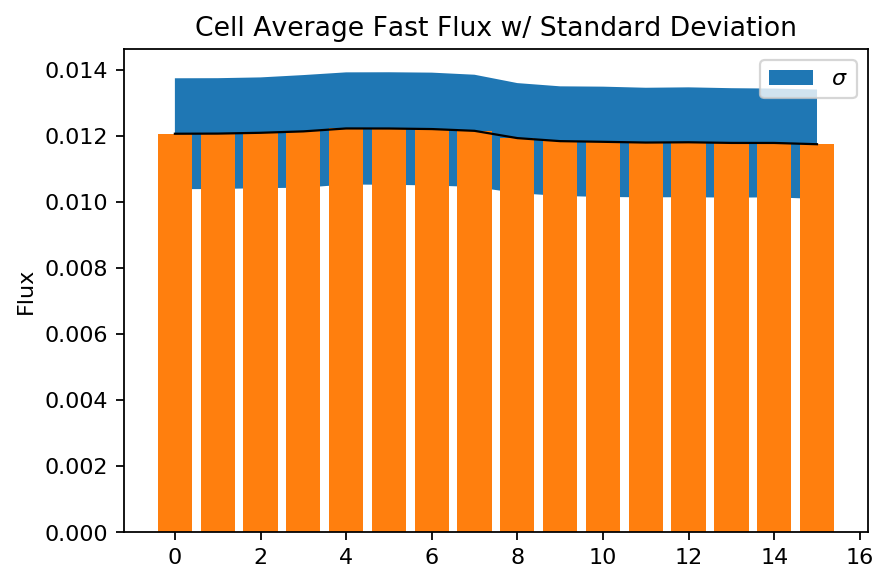

In [42]:
plot_flux2(Flux1cell, Flux1cell_std)

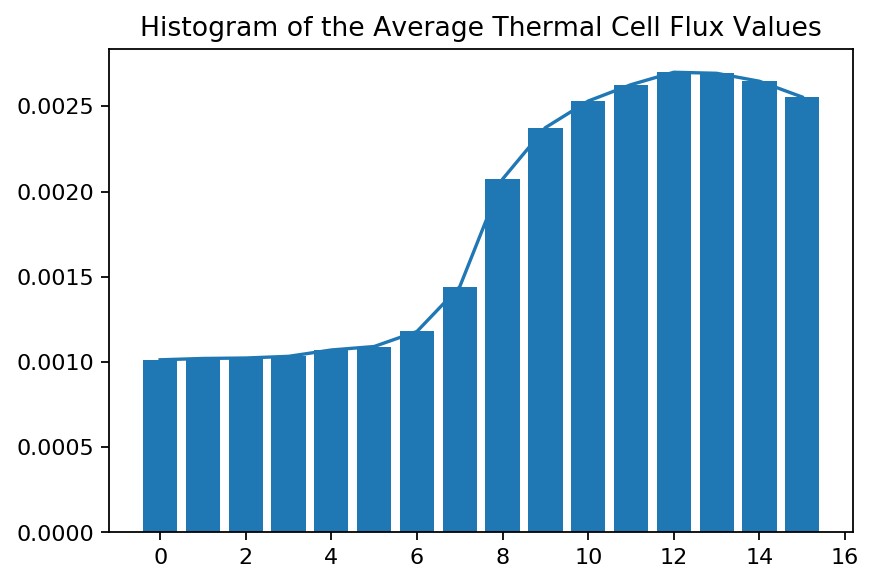

In [22]:
fig, (ax) = plt.subplots(1, dpi = 160)
ax.plot(range(len(Flux2cell)), Flux2cell, label = 'thermal')
ax.bar(range(len(Flux2cell)), Flux2cell)
#ax.hist(Flux2cell, label = 'thermal')
ax.set_title('Histogram of the Average Thermal Cell Flux Values')
plt.show()

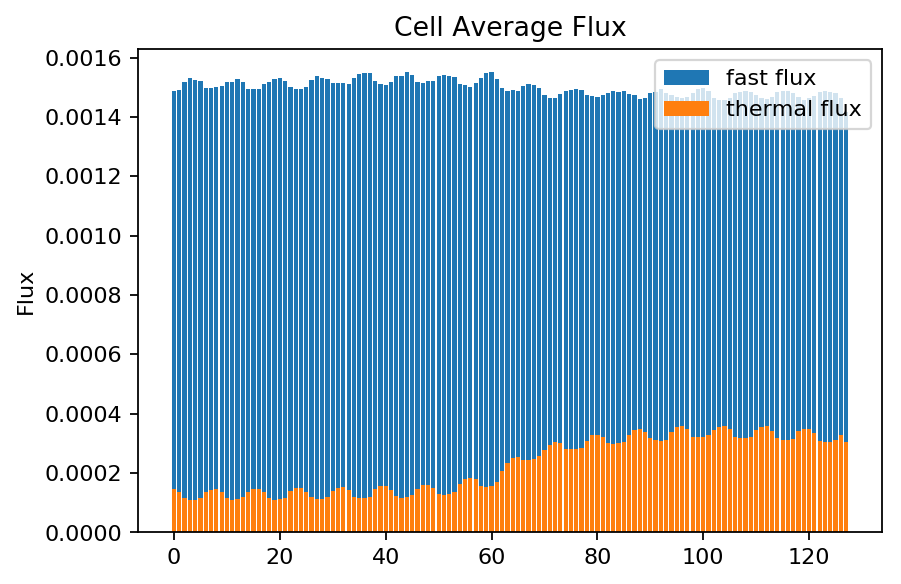

In [47]:
fig, (ax) = plt.subplots(1, dpi = 160)
ax.bar(range(len(Flux1)), Flux1, label = 'fast flux')
ax.bar(range(len(Flux2)), Flux2, label = 'thermal flux')
ax.set_ylabel('Flux')
ax.set_title('Cell Average Flux')
ax.legend()
plt.show()

In [14]:
#plot_flux(Flux1, Flux1_std, Flux2, Flux2_std)

In [15]:
Flux1 = Flux1.reshape(-1,1)
Flux1_std = Flux1_std.reshape(-1,1)
Flux2 = Flux2.reshape(-1,1)
Flux2_std = Flux2_std.reshape(-1,1)

In [16]:
np.savetxt("mydata3.csv", (Flux1cell, Flux1cell_std, Flux2cell, Flux2cell_std), delimiter=',')

In [17]:
Cur2_std

array([ 0.05718595,  0.22348042,  0.11791412,  0.04623334,  0.02095959,
        0.04701087,  0.11550166,  0.06034183,  0.03505585,  0.05494115,
        0.11386013,  0.04581944,  0.02780481,  0.05064312,  0.12130807,
        0.06229798,  0.03690818,  0.0585571 ,  0.11186342,  0.04519315,
        0.02542846,  0.05058978,  0.11897538,  0.06639988,  0.03223368,
        0.05956287,  0.11388911,  0.04503466,  0.02825965,  0.05286613,
        0.12407479,  0.06688082,  0.03656656,  0.05680785,  0.11141779,
        0.0434732 ,  0.03043861,  0.05987517,  0.13439003,  0.07244344,
        0.03820098,  0.05085888,  0.11024936,  0.03886535,  0.03337381,
        0.06839479,  0.14026759,  0.08916322,  0.04126399,  0.046073  ,
        0.09572195,  0.027993  ,  0.04339953,  0.08932681,  0.17613236,
        0.11934589,  0.06987452,  0.03486563,  0.07380281,  0.04258542,
        0.09902877,  0.16109022,  0.28363745,  0.22517683,  0.17607672,
        0.12761294,  0.04079236,  0.09358893,  0.11487703,  0.13

In [46]:
np.std(k[25:])

0.052015085326305215